In [1]:
import pandas as pd


In [2]:
# test = pd.read_csv("test_preproscced.csv")
train = pd.read_csv("save_df.csv")


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sex_male_div_SibSp         891 non-null    float64
 1   Sex_female_div_Embarked_C  891 non-null    float64
 2   Sex_female_div_Embarked_Q  891 non-null    float64
 3   Sex_female_add_Embarked_C  891 non-null    int64  
 4   Sex_male_mul_Age           891 non-null    float64
 5   Sex_female_div_Parch       891 non-null    float64
 6   Sex_female_add_Embarked_Q  891 non-null    int64  
 7   Pclass_mul_Sex_female      891 non-null    int64  
 8   Sex_female_div_Sex_male    891 non-null    float64
 9   Embarked_Q_sub_Sex_female  891 non-null    int64  
 10  Pclass_add_Sex_male        891 non-null    int64  
 11  Pclass_sub_Embarked_S      891 non-null    int64  
 12  Pclass_sub_Sex_female      891 non-null    int64  
 13  Fare_sub_Age               891 non-null    float64

In [4]:
train.head(20)

,Sex_male_div_SibSp,Sex_female_div_Embarked_C,Sex_female_div_Embarked_Q,Sex_female_add_Embarked_C,Sex_male_mul_Age,Sex_female_div_Parch,Sex_female_add_Embarked_Q,Pclass_mul_Sex_female,Sex_female_div_Sex_male,Embarked_Q_sub_Sex_female,...,Age_add_Embarked_Q,Age_add_SibSp,Pclass_sub_Fare,Pclass_div_Fare,Pclass_mul_Age,Parch_add_SibSp,Fare_sub_Sex_male,Fare_add_Sex_male,PassengerId,Survived
0,1.000000e+00,0.0,0.0,0,22.000000,0.0,0,0,0.0,0,...,22.000000,23.000000,-4.2500,0.413793,66.000000,1,6.2500,8.2500,1,0
1,0.000000e+00,1.0,100000000.0,2,0.000000,100000000.0,1,1,100000000.0,255,...,38.000000,39.000000,-70.2833,0.014029,38.000000,1,71.2833,71.2833,2,1
2,0.000000e+00,100000000.0,100000000.0,1,0.000000,100000000.0,1,3,100000000.0,255,...,26.000000,26.000000,-4.9250,0.378549,78.000000,0,7.9250,7.9250,3,1
3,0.000000e+00,100000000.0,100000000.0,1,0.000000,100000000.0,1,1,100000000.0,255,...,35.000000,36.000000,-52.1000,0.018832,35.000000,1,53.1000,53.1000,4,1
4,1.000000e+08,0.0,0.0,0,35.000000,0.0,0,0,0.0,0,...,35.000000,35.000000,-5.0500,0.372671,105.000000,0,7.0500,9.0500,5,0
5,1.000000e+08,0.0,0.0,0,29.699118,0.0,1,0,0.0,1,...,30.699118,29.699118,-5.4583,0.354681,89.097353,0,7.4583,9.4583,6,0
6,1.000000e+08,0.0,0.0,0,54.000000,0.0,0,0,0.0,0,...,54.000000,54.000000,-50.8625,0.019282,54.000000,0,50.8625,52.8625,7,0
7,3.333333e-01,0.0,0.0,0,2.000000,0.0,0,0,0.0,0,...,2.000000,5.000000,-18.0750,0.142349,6.000000,4,20.0750,22.0750,8,0
8,0.000000e+00,100000000.0,100000000.0,1,0.000000,0.5,1,3,100000000.0,255,...,27.000000,27.000000,-8.1333,0.269462,81.000000,2,11.1333,11.1333,9,1
9,0.000000e+00,1.0,100000000.0,2,0.000000,100000000.0,1,2,100000000.0,255,...,14.000000,15.000000,-28.0708,0.066510,28.000000,1,30.0708,30.0708,10,1


In [5]:
train_y = train["Survived"][train["PassengerId"]%10 >= 7]
train_X = train.drop("Survived", axis=1)[train["PassengerId"]%10 >= 7]

In [6]:
test_y = train["Survived"][train["PassengerId"]%10 <= 6]
test_X = train.drop("Survived", axis=1)[train["PassengerId"]%10 <= 6]

In [7]:
train_y_nn = train["Survived"][train["PassengerId"]%10 >= 7]
train_X_nn = train.drop("Survived", axis=1)[train["PassengerId"]%10 >= 7]

test_y_nn = train["Survived"][train["PassengerId"]%10 <= 6]
test_X_nn = train.drop("Survived", axis=1)[train["PassengerId"]%10 <= 6]

In [8]:
train.shape

(891, 32)

In [9]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(267, 31)
(267,)
(624, 31)
(624,)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
# accuracy_score(pred, test_y)


0.7955874534821903

[[0.78 0.22]
 [0.07 0.93]
 [0.46 0.54]
 ...
 [0.81 0.19]
 [0.36 0.64]
 [0.68 0.32]]


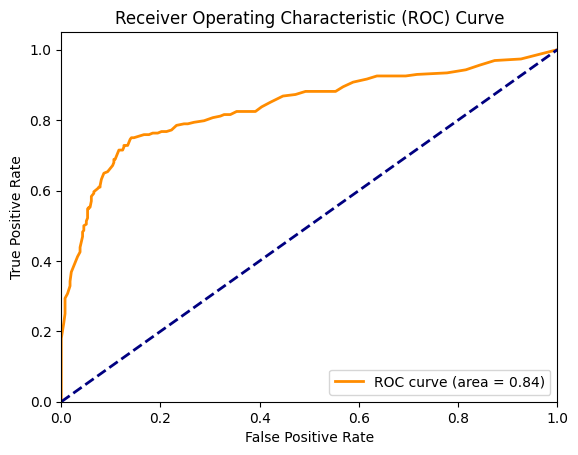

[0.22 0.93 0.54 0.93 0.13 0.14 0.89 0.56 0.72 0.09 0.09 0.73 0.84 0.89
 0.15 0.36 0.88 0.61 0.45 0.06 0.15 0.61 0.85 0.95 0.34 0.29 0.4  0.78
 0.29 0.94 0.26 0.61 0.86 0.05 0.33 0.08 0.16 0.9  1.   0.41 0.62 0.05
 0.11 0.98 0.21 0.2  0.61 0.16 0.21 0.35 0.14 0.23 0.39 0.45 0.57 0.86
 0.02 0.26 0.96 0.31 0.99 0.3  0.16 0.04 0.02 0.33 0.16 0.18 0.01 0.01
 0.86 0.06 0.31 0.07 0.05 0.18 0.65 0.28 0.53 0.01 0.9  0.54 0.01 0.21
 0.21 0.02 0.1  0.95 0.27 0.33 0.32 0.13 0.25 0.2  1.   0.29 0.36 0.38
 0.64 0.7  0.41 0.23 0.34 0.2  0.62 0.33 0.99 0.35 0.14 0.31 0.47 0.07
 0.15 0.79 0.71 0.01 0.37 0.19 0.16 0.37 0.16 0.76 0.01 0.46 0.07 0.08
 0.17 0.42 0.05 0.73 0.59 0.3  0.02 0.95 0.4  0.69 0.65 0.83 0.85 0.98
 0.34 0.07 0.12 0.24 0.02 0.8  0.65 0.63 0.98 0.07 0.19 0.05 1.   0.26
 0.02 0.29 0.39 0.05 0.24 0.09 0.28 1.   0.42 0.24 0.18 0.11 0.69 0.24
 0.41 0.8  0.3  0.18 0.1  0.25 0.04 0.27 0.9  0.18 0.11 0.32 0.6  0.72
 0.03 0.17 0.35 0.21 0.98 0.32 0.98 0.89 0.45 0.86 0.65 0.98 0.89 0.5
 0.05 0

In [11]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# ランダムフォレストモデルの構築とトレーニング
clf = RandomForestClassifier(random_state=0)
clf.fit(train_X, train_y)

# テストデータに対する予測
pred_proba = clf.predict_proba(test_X)[:, 1]

print(clf.predict_proba(test_X))
# ROC曲線の計算
fpr, tpr, thresholds = roc_curve(test_y, pred_proba)

# AUCの計算
roc_auc = auc(fpr, tpr)

# ROC曲線のプロット
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(pred_proba)
print(roc_auc)


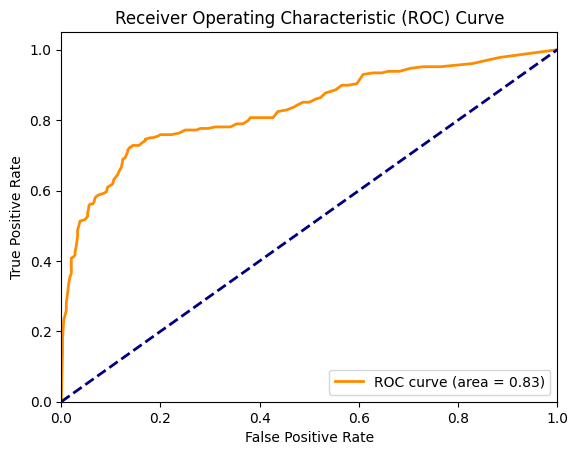

[0.22 0.93 0.54 0.93 0.13 0.14 0.89 0.56 0.72 0.09 0.09 0.73 0.84 0.89
 0.15 0.36 0.88 0.61 0.45 0.06 0.15 0.61 0.85 0.95 0.34 0.29 0.4  0.78
 0.29 0.94 0.26 0.61 0.86 0.05 0.33 0.08 0.16 0.9  1.   0.41 0.62 0.05
 0.11 0.98 0.21 0.2  0.61 0.16 0.21 0.35 0.14 0.23 0.39 0.45 0.57 0.86
 0.02 0.26 0.96 0.31 0.99 0.3  0.16 0.04 0.02 0.33 0.16 0.18 0.01 0.01
 0.86 0.06 0.31 0.07 0.05 0.18 0.65 0.28 0.53 0.01 0.9  0.54 0.01 0.21
 0.21 0.02 0.1  0.95 0.27 0.33 0.32 0.13 0.25 0.2  1.   0.29 0.36 0.38
 0.64 0.7  0.41 0.23 0.34 0.2  0.62 0.33 0.99 0.35 0.14 0.31 0.47 0.07
 0.15 0.79 0.71 0.01 0.37 0.19 0.16 0.37 0.16 0.76 0.01 0.46 0.07 0.08
 0.17 0.42 0.05 0.73 0.59 0.3  0.02 0.95 0.4  0.69 0.65 0.83 0.85 0.98
 0.34 0.07 0.12 0.24 0.02 0.8  0.65 0.63 0.98 0.07 0.19 0.05 1.   0.26
 0.02 0.29 0.39 0.05 0.24 0.09 0.28 1.   0.42 0.24 0.18 0.11 0.69 0.24
 0.41 0.8  0.3  0.18 0.1  0.25 0.04 0.27 0.9  0.18 0.11 0.32 0.6  0.72
 0.03 0.17 0.35 0.21 0.98 0.32 0.98 0.89 0.45 0.86 0.65 0.98 0.89 0.5
 0.05 0

In [12]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# ランダムフォレスト回帰モデルの構築とトレーニング
regressor = RandomForestRegressor(random_state=0)
regressor.fit(train_X, train_y)

# テストデータに対する予測
pred = regressor.predict(test_X)

# ROC曲線の計算
fpr, tpr, thresholds = roc_curve(test_y, pred)

# AUCの計算
roc_auc = auc(fpr, tpr)

# ROC曲線のプロット
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print(pred_proba)
print(roc_auc)

In [13]:
pd.DataFrame({"clf":pred_proba, "reg":pred})


,clf,reg
0,0.22,0.53
1,0.93,0.80
2,0.54,0.55
3,0.93,0.81
4,0.13,0.46
...,...,...
619,0.14,0.05
620,0.38,0.21
621,0.19,0.20
622,0.64,0.60


In [14]:
roc_auc_score(test_y, pred)

0.8310351320219741

In [15]:
train_X.head()

,Sex_male_div_SibSp,Sex_female_div_Embarked_C,Sex_female_div_Embarked_Q,Sex_female_add_Embarked_C,Sex_male_mul_Age,Sex_female_div_Parch,Sex_female_add_Embarked_Q,Pclass_mul_Sex_female,Sex_female_div_Sex_male,Embarked_Q_sub_Sex_female,...,Sex_male_add_Pclass,Age_add_Embarked_Q,Age_add_SibSp,Pclass_sub_Fare,Pclass_div_Fare,Pclass_mul_Age,Parch_add_SibSp,Fare_sub_Sex_male,Fare_add_Sex_male,PassengerId
6,1.000000e+08,0.0,0.0,0,54.000000,0.0,0,0,0.0,0,...,2,54.000000,54.000000,-50.8625,0.019282,54.000000,0,50.8625,52.8625,7
7,3.333333e-01,0.0,0.0,0,2.000000,0.0,0,0,0.0,0,...,4,2.000000,5.000000,-18.0750,0.142349,6.000000,4,20.0750,22.0750,8
8,0.000000e+00,100000000.0,100000000.0,1,0.000000,0.5,1,3,100000000.0,255,...,3,27.000000,27.000000,-8.1333,0.269462,81.000000,2,11.1333,11.1333,9
16,2.500000e-01,0.0,0.0,0,2.000000,0.0,1,0,0.0,1,...,4,3.000000,6.000000,-26.1250,0.103004,6.000000,5,28.1250,30.1250,17
17,1.000000e+08,0.0,0.0,0,29.699118,0.0,0,0,0.0,0,...,3,29.699118,29.699118,-11.0000,0.153846,59.398235,0,12.0000,14.0000,18


In [16]:

cd /Users/hirahirayuto/Downloads/kagglebook-master/ch07

/Users/hirahirayuto/Downloads/kagglebook-master/ch07


In [18]:
# ---------------------------------
# データ等の準備
# ----------------------------------
import numpy as np
import pandas as pd

# # train_Xは学習データ、train_yは目的変数、test_Xはテストデータ
# # pandasのDataFrame, Seriesで保持します。（numpyのarrayで保持することもあります）

import pandas as pd

# test = pd.read_csv("test_preproscced.csv")
train = pd.read_csv("save_df.csv")

train.info()
train.head(20)
train_y = train["Survived"][train["PassengerId"]%10 >= 7]
train_X = train.drop("Survived", axis=1)[train["PassengerId"]%10 >= 7]
test_y = train["Survived"][train["PassengerId"]%10 <= 6]
test_X = train.drop("Survived", axis=1)[train["PassengerId"]%10 <= 6]
train_y_nn = train["Survived"][train["PassengerId"]%10 >= 7]
train_X_nn = train.drop("Survived", axis=1)[train["PassengerId"]%10 >= 7]

test_y_nn = train["Survived"][train["PassengerId"]%10 <= 6]
test_X_nn = train.drop("Survived", axis=1)[train["PassengerId"]%10 <= 6]


# ---------------------------------
# スタッキング
# ----------------------------------
# from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

# models.pyにModel1Xgb, Model1NN, Model2Linearを定義しているものとする
# 各クラスは、fitで学習し、predictで予測値の確率を出力する

from models import Model1Xgb, Model1NN, Model2Linear, Model1LightGBM, Model1CatBoost,Model1KNN
# from models import Model1Xgb, Model1NN, Model2Linear



# 学習データに対する「目的変数を知らない」予測値と、テストデータに対する予測値を返す関数
def predict_cv(model, train_X, train_y, test_X):
    preds = []
    preds_test = []
    va_idxes = []

    kf = KFold(n_splits=4, shuffle=True, random_state=71)

    # クロスバリデーションで学習・予測を行い、予測値とインデックスを保存する
    for i, (tr_idx, va_idx) in enumerate(kf.split(train_X)):
        tr_x, va_x = train_X.iloc[tr_idx], train_X.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
        model.fit(tr_x, tr_y, va_x, va_y)
        pred = model.predict(va_x)
        preds.append(pred)

        pred_test = model.predict(test_X)

        preds_test.append(pred_test)
        va_idxes.append(va_idx)

    # バリデーションデータに対する予測値を連結し、その後元の順序に並べ直す
    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds, axis=0)
    order = np.argsort(va_idxes)
    pred_train = preds[order]

    # テストデータに対する予測値の平均をとる
    preds_test = np.mean(preds_test, axis=0)

    return pred_train, preds_test

# 1層目のモデル
# pred_train_1a, pred_train_1bは、学習データのクロスバリデーションでの予測値
# pred_test_1a, pred_test_1bは、テストデータの予測値
model_1a = Model1Xgb()
pred_train_1a, pred_test_1a = predict_cv(model_1a, train_X, train_y, test_X)

model_1b = Model1NN()
pred_train_1b, pred_test_1b = predict_cv(model_1b, train_X, train_y, test_X)

model_1c = Model1LightGBM()
pred_train_1c, pred_test_1c = predict_cv(model_1c, train_X, train_y, test_X)

model_1d = Model1CatBoost()
pred_train_1d, pred_test_1d = predict_cv(model_1d, train_X, train_y, test_X)

model_1e = Model1KNN()
pred_train_1e, pred_test_1e = predict_cv(model_1e, train_X, train_y, test_X)



# 予測値を特徴量としてデータフレームを作成
train_X_2 = pd.DataFrame({'pred_1a': pred_train_1a, 'pred_1b': pred_train_1b, 
                          'pred_1c': pred_train_1c,'pred_1d': pred_train_1d, 'pred_1e': pred_train_1e})
test_X_2 = pd.DataFrame({'pred_1a': pred_test_1a, 'pred_1b': pred_test_1b, 
                         'pred_1c': pred_test_1c,'pred_1d': pred_test_1d, 'pred_1e': pred_test_1e})


# train_X = train_X.reset_index()
# train_X_2 = pd.concat([train_X_2, train_X], axis=1)
# test_X = test_X.reset_index()
# test_X_2 = pd.concat([test_X_2, test_X], axis=1)

# 2層目のモデル
# pred_train_2は、2層目のモデルの学習データのクロスバリデーションでの予測値
# pred_test_2は、2層目のモデルのテストデータの予測値
model_2 = Model2Linear()
pred_train_2, pred_test_2 = predict_cv(model_2, train_X_2, train_y, test_X_2)


# 1層目のモデルの評価
print("xgb")
print(f'1aAUC_train: {roc_auc_score(train_y, pred_train_1a):.4f}')
print(f'1aAUC_test: {roc_auc_score(test_y, pred_test_1a):.4f}')

print("NN")
print(f'1bAUC_train: {roc_auc_score(train_y, pred_train_1b):.4f}')
print(f'1bAUC_test: {roc_auc_score(test_y, pred_test_1b):.4f}')

print("LGBM")
print(f'1cAUC_train: {roc_auc_score(train_y, pred_train_1c):.4f}')
print(f'1cAUC_test: {roc_auc_score(test_y, pred_test_1c):.4f}')

print("CAT")
print(f'1dAUC_train: {roc_auc_score(train_y, pred_train_1d):.4f}')
print(f'1dAUC_test: {roc_auc_score(test_y, pred_test_1d):.4f}')

print("knn")
print(f'1eAUC_train: {roc_auc_score(train_y, pred_train_1e):.4f}')
print(f'1eAUC_test: {roc_auc_score(test_y, pred_test_1e):.4f}')

print("logi")
# 2層目のモデルの評価
print(f'2AUC_trian: {roc_auc_score(train_y, pred_train_2):.4f}')
print(f'2AUC_test: {roc_auc_score(test_y, pred_test_2):.4f}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sex_male_div_SibSp         891 non-null    float64
 1   Sex_female_div_Embarked_C  891 non-null    float64
 2   Sex_female_div_Embarked_Q  891 non-null    float64
 3   Sex_female_add_Embarked_C  891 non-null    int64  
 4   Sex_male_mul_Age           891 non-null    float64
 5   Sex_female_div_Parch       891 non-null    float64
 6   Sex_female_add_Embarked_Q  891 non-null    int64  
 7   Pclass_mul_Sex_female      891 non-null    int64  
 8   Sex_female_div_Sex_male    891 non-null    float64
 9   Embarked_Q_sub_Sex_female  891 non-null    int64  
 10  Pclass_add_Sex_male        891 non-null    int64  
 11  Pclass_sub_Embarked_S      891 non-null    int64  
 12  Pclass_sub_Sex_female      891 non-null    int64  
 13  Fare_sub_Age               891 non-null    float64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [00:18:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


[45]	train-auc:1.00000	eval-auc:0.81238
[46]	train-auc:1.00000	eval-auc:0.81707
[47]	train-auc:1.00000	eval-auc:0.81332
[48]	train-auc:1.00000	eval-auc:0.81332
[49]	train-auc:1.00000	eval-auc:0.81426
[50]	train-auc:1.00000	eval-auc:0.81051
[51]	train-auc:1.00000	eval-auc:0.80863
[52]	train-auc:1.00000	eval-auc:0.80300
[53]	train-auc:1.00000	eval-auc:0.81144
[54]	train-auc:1.00000	eval-auc:0.80675
[55]	train-auc:1.00000	eval-auc:0.80488
[56]	train-auc:1.00000	eval-auc:0.80488
[57]	train-auc:1.00000	eval-auc:0.79737
[58]	train-auc:1.00000	eval-auc:0.80488
[59]	train-auc:1.00000	eval-auc:0.80582
[60]	train-auc:1.00000	eval-auc:0.79925
[61]	train-auc:1.00000	eval-auc:0.79831
[62]	train-auc:1.00000	eval-auc:0.80206
[63]	train-auc:1.00000	eval-auc:0.79831
[64]	train-auc:1.00000	eval-auc:0.79737
[65]	train-auc:1.00000	eval-auc:0.79644
[66]	train-auc:1.00000	eval-auc:0.80769
[67]	train-auc:1.00000	eval-auc:0.80582
[68]	train-auc:1.00000	eval-auc:0.80863
[69]	train-auc:1.00000	eval-auc:0.81332


xgb
1aAUC_train: 0.8304
1aAUC_test: 0.8339
NN
1bAUC_train: 0.8646
1bAUC_test: 0.8502
LGBM
1cAUC_train: 0.8265
1cAUC_test: 0.8362
logi
2AUC_trian: 0.8552
2AUC_test: 0.8491